<a href="https://colab.research.google.com/github/BrainsCorp/Data-Science-Stuff/blob/master/Forcasting_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Reference:
> Data Mining for Business Analytics - O'Reilly Publication
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

## Time Series
> 1. Time Series data is the data which includes time (day, month, year, utc) as a must feature.\
2. It is a sequence of data points collected at successive points in time (at regular interval - hour, daily, monthly or annually)
3. Which means data is ordered in chronological pattern, and preferred in Series.
4. Components of Time Series -
  1. *Level* - base value or average value of the series
  2. *Trend* - change in series from one point to another like a slope of a line.
  3. *seasonality* - a short term cyclic pattern in the series like electricity consumption during four seasons in a year.

## Descriptive v Predictive Modelling
1. There are two types of modelling in time series\
2. **Descriptive (time series analysis)**: is used to model or figure out trend, seasonal patterns, relation with exteral factors, etc. So, basically What and How. Descriptive Analysis is retrospective in nature, means - past, present and future values are used to smooth the current value.

3. **Predictive (time series forcasting)**:
is used to predict future valuesin the series. Forcasting is Prospective in nature, means - it takes past and present values to output future value.

## Forcasting Methods
1. **Combine Approach** - which uses multiple model sequencially to improve accuracy. like Level 1: apply 1st model to forecast values. and Leve 2: model the residual from Level 1 using another method to forecast errors and adjust the initial forecast.

1. **Ensemble Approach** - which combines a multiple models in parallel and average the results from them to give more robust and higher precision results.

In [ ]:
# install libraries
!pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 86.7 MB/s eta 0:00:00


In [ ]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary

Colab environment detected.


In [ ]:
# load the dataset - Amrtak.csv
ridership = pd.read_csv('Amtrak.csv', parse_dates=['Month'], date_format="%d/%m/%Y", header=0)
ridership.head()

,Month,Ridership
0,1991-01-01,1708.917
1,1991-02-01,1620.586
2,1991-03-01,1972.715
3,1991-04-01,1811.665
4,1991-05-01,1974.964


In [ ]:
# feature information
ridership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      159 non-null    datetime64[ns]
 1   Ridership  159 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [ ]:
# setting defualt plotting params
title_fontdict = {
    'family': 'monospace',
    'color':  'black',
    'weight': 'normal',
    'size': 12,
}

label_fontdict = {
    'family': 'monospace',
    'color':  'black',
    'weight': 'normal',
    'size': 10,
}

sns.set(
    style='whitegrid',
    font=label_fontdict['family'],
    rc={
        'figure.figsize': (10, 6), # (width, height)
        'axes.labelsize': label_fontdict['size'],
        'axes.labelweight': label_fontdict['weight'],
        'axes.labelcolor': label_fontdict['color'],

        'axes.titlesize': title_fontdict['size'],
        'axes.titleweight': title_fontdict['weight'],
        'axes.titlecolor': title_fontdict['color'],

        'xtick.labelsize': label_fontdict['size'] - 2,
        'ytick.labelsize': label_fontdict['size'] - 2,

        'text.color': label_fontdict['color'],
        'font.weight': label_fontdict['weight'],
    }
)

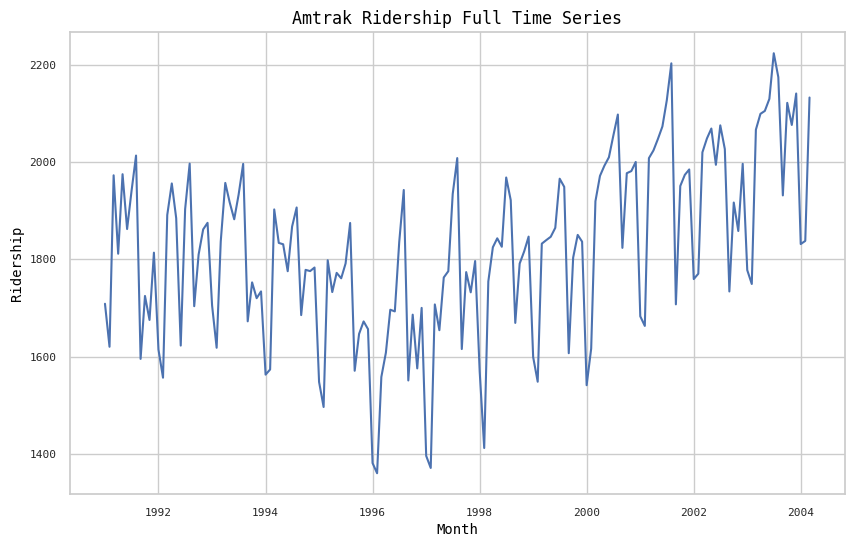

In [ ]:
# visualize time series - line chart
sns.lineplot(
    data=ridership,
    x='Month',
    y='Ridership',
    estimator=None
)
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.title('Amtrak Ridership Full Time Series')
plt.show()

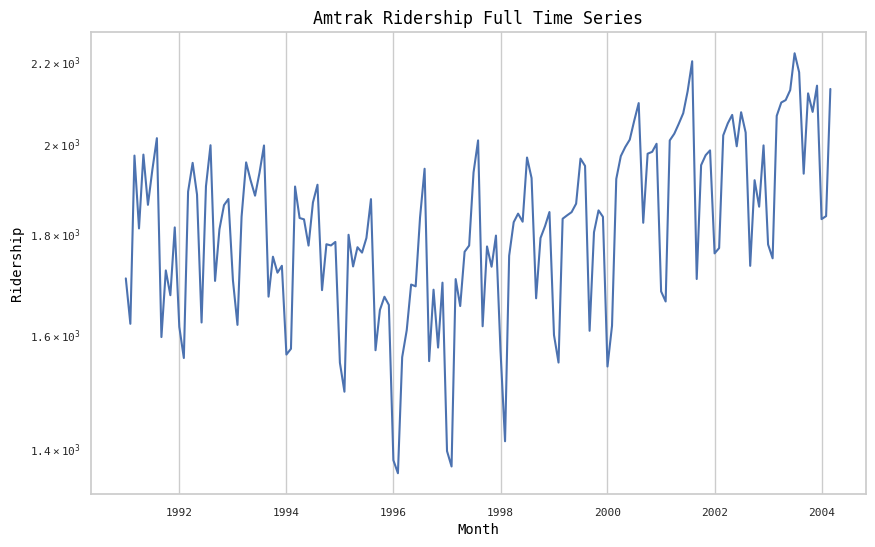

In [ ]:
# Change scale to Exponential - log
ax = sns.lineplot(
    data=ridership,
    x='Month',
    y='Ridership',
    estimator=None
)
ax.set_yscale('log')

plt.yscale('log')
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.title('Amtrak Ridership Full Time Series')
plt.show()

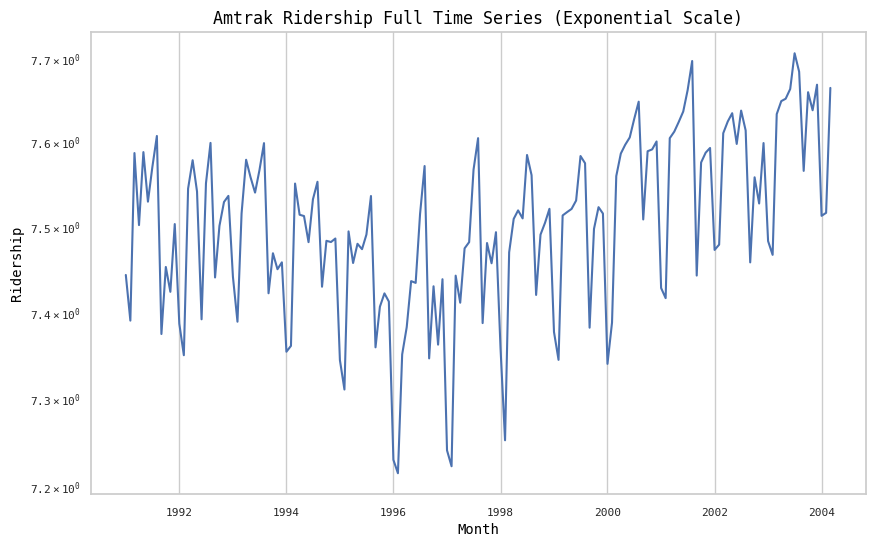

In [ ]:
# changing the series scale to exponential
ridership['log_ridership'] = np.log(ridership['Ridership'])

# visualize
ax = sns.lineplot(
    data=ridership,
    x='Month',
    y='log_ridership',
    estimator=None
)
ax.set_yscale('log')

plt.yscale('log')
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.title('Amtrak Ridership Full Time Series (Exponential Scale)')
plt.show()

#### Zooming In

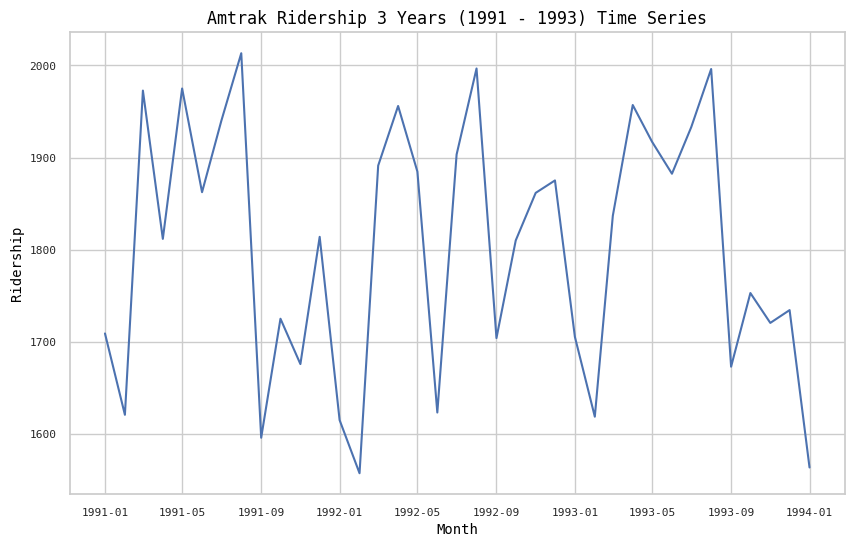

In [ ]:
ridership_df_3yrs = ridership[ridership['Month'] <= '1994-01-01']

# visualize
ax = sns.lineplot(
    data=ridership_df_3yrs,
    x='Month',
    y='Ridership',
    estimator=None
)

plt.xlabel('Month')
plt.ylabel('Ridership')
plt.title('Amtrak Ridership 3 Years (1991 - 1993) Time Series')
plt.show()

#### Trend Line

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Amtrak Ridership Full Time Series with Trend Line')

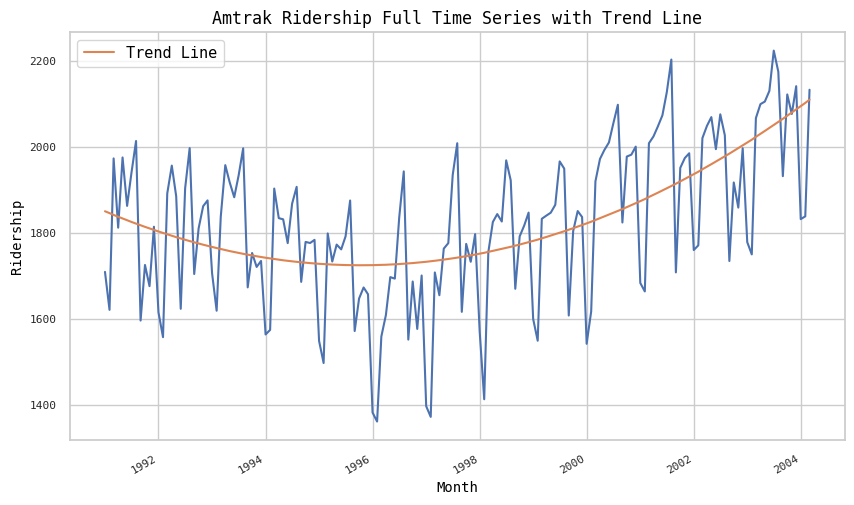

In [ ]:
# ridership time series
ridership_ts = ridership[['Month', 'Ridership']].set_index('Month')

# the following command adds a constant term, a trend term and a quadratic trend term
ridership_df = tsatools.add_trend(ridership_ts, trend='ctt')

# fit a linear regression model to the time series
ridership_lm = sm.ols(
    formula='Ridership ~ trend + trend_squared',
    data=ridership_df
    ).fit()


# visualize
ax = sns.lineplot(
    data=ridership_df,
    x='Month',
    y='Ridership',
    estimator=None
)

ridership_lm.predict(ridership_df).plot(
    ax=ax,
    color='C1',
    label='Trend Line'
)

plt.xlabel('Month')
plt.ylabel('Ridership')
plt.legend()
plt.title('Amtrak Ridership Full Time Series with Trend Line')

#### Seasonal Trends

In [ ]:
nValid = 36 # months 3Yrs
nTrain = len(ridership_ts) - nValid

# Partition data
train_ts = ridership_ts[:nTrain]
valid_ts = ridership_ts[nTrain:]

# shape
print(f'Train Shape: {train_ts.shape}')
print(f'Valid Shape: {valid_ts.shape}')

Train Shape: (123, 1)
Valid Shape: (36, 1)


In [ ]:
# generate the naive and seasonal naive forecast

# naive forecast - takes last day value
naive_pred = pd.Series(train_ts.iloc[-1].values[0], index=valid_ts.index)

# seasonal forecast - takes last period
last_season = train_ts.iloc[-12:] # 12 months

# validset predict
seasonal_pred = pd.Series(
    pd.concat([last_season]*5)[:len(valid_ts)].values.flatten(),
    index=valid_ts.index
)

# shape
print(f'Naive Forecast Shape: {naive_pred.shape}')
print(f'Seasonal Forecast Shape: {seasonal_pred.shape}')

Naive Forecast Shape: (36,)
Seasonal Forecast Shape: (36,)


<Figure size 1200x600 with 0 Axes>

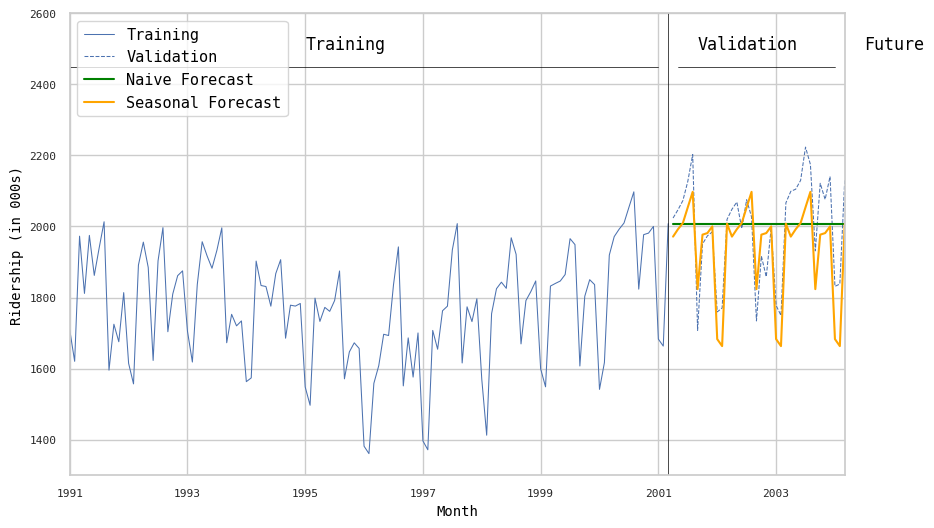

In [ ]:
# visualize forecast
# plot forecasts and actual in the training and validation sets
plt.figure(figsize=(12, 6))
ax = train_ts.plot(color='C0', linewidth=0.75)
valid_ts.plot(ax=ax, color='C0', linestyle='dashed', linewidth=0.75)
ax.set_xlim('1990', '2006-6')
ax.set_ylim(1300, 2600)
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
naive_pred.plot(ax=ax, color='green')
seasonal_pred.plot(ax=ax, color='orange')


# determine coordinates for drawing the arrows and lines
one_month = pd.Timedelta('31 days')
xtrain = (min(train_ts.index), max(train_ts.index) - one_month)
xvalid = (min(valid_ts.index) + one_month, max(valid_ts.index) - one_month)
xfuture = (max(valid_ts.index) + one_month, '2006')
xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
xvf = xvalid[1] + 0.5 * (xfuture[0] - xvalid[1])
ax.add_line(plt.Line2D(xtrain, (2450, 2450), color='black', linewidth=0.5))
ax.add_line(plt.Line2D(xvalid, (2450, 2450), color='black', linewidth=0.5))
ax.add_line(plt.Line2D(xfuture, (2450, 2450), color='black', linewidth=0.5))
ax.text('1995', 2500, 'Training')
ax.text('2001-9', 2500, 'Validation')
ax.text('2004-7', 2500, 'Future')
ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

plt.legend(['Training', 'Validation', 'Naive Forecast', 'Seasonal Forecast'])
plt.show()

In [ ]:
# Naive - model performance
regressionSummary(valid_ts, naive_pred)


Regression statistics

                      Mean Error (ME) : -14.7177
       Root Mean Squared Error (RMSE) : 142.7551
            Mean Absolute Error (MAE) : 115.9234
          Mean Percentage Error (MPE) : -1.2750
Mean Absolute Percentage Error (MAPE) : 6.0214


In [ ]:
# Seasonal - model performance
regressionSummary(valid_ts, seasonal_pred)


Regression statistics

                      Mean Error (ME) : 54.7296
       Root Mean Squared Error (RMSE) : 95.6243
            Mean Absolute Error (MAE) : 84.0941
          Mean Percentage Error (MPE) : 2.6528
Mean Absolute Percentage Error (MAPE) : 4.2477


### 📊 Breakdown of Forecast Metrics

| Metric | What It Measures | Value | Interpretation |
|--------|------------------|--------|----------------|
| **Mean Error (ME)** | Average bias | `+54.73` | Model tends to **overpredict** ridership |
| **Root Mean Squared Error (RMSE)** | Penalizes larger errors | `95.62` | Indicates occasional larger misses |
| **Mean Absolute Error (MAE)** | Average magnitude of error | `84.09` | Forecast is off by ~84 riders per month (in 000s) |
| **Mean Percentage Error (MPE)** | Directional bias (% based) | `+2.65%` | Slight overprediction relative to actuals |
| **Mean Absolute Percentage Error (MAPE)** | Avg error size (% based) | `4.25%` | Forecasts are within ~4.25% of actual values on average |



#### Linear Trend

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


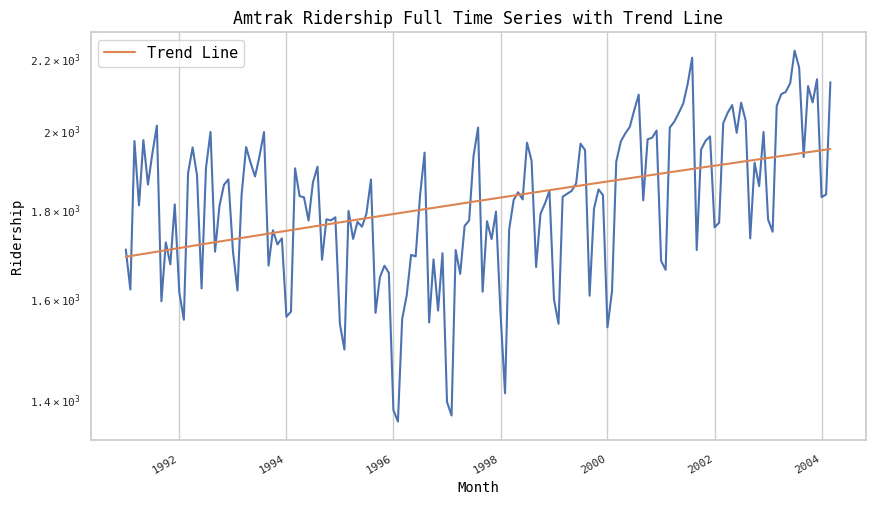

In [ ]:
# constant trend
ridership_df = tsatools.add_trend(ridership_ts, trend='ct')

# fit a linear regression
ridership_lm = sm.ols(
    formula='Ridership ~ trend',
    data=ridership_df
    ).fit()

# visualize
ax = sns.lineplot(
    data=ridership_df,
    x='Month',
    y='Ridership',
    estimator=None
)
ax.set_yscale('log')

lm_pred = ridership_lm.predict(ridership_df)
lm_pred.plot(
    ax=ax,
    color='C1',
    label='Trend Line'
)

plt.yscale('log')
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.legend()
plt.title('Amtrak Ridership Full Time Series with Trend Line')
plt.show()

#### Linear (ct) vs Quandratic Trend (ctt)

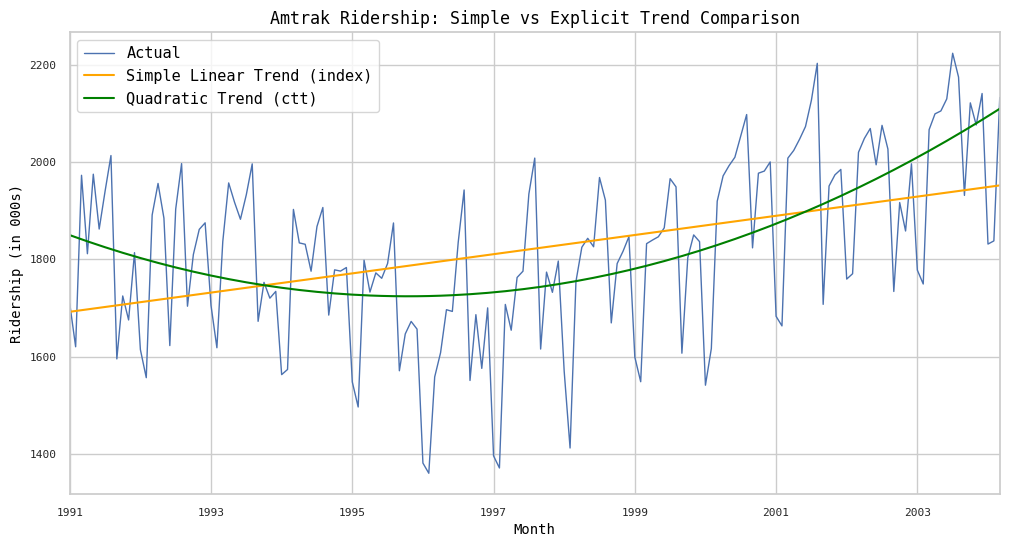

In [ ]:
# Set up the data
ridership_ts = ridership[['Month', 'Ridership']].set_index('Month')

# --- Fit Simple Linear Regression ---
ridership_df = tsatools.add_trend(ridership_ts, trend='ct')
model_simple = sm.ols(formula='Ridership ~ trend', data=ridership_df).fit()

# --- Add Explicit Trend Variables ---
ridership_df = tsatools.add_trend(ridership_ts, trend='ctt')
model_trend = sm.ols(formula='Ridership ~ trend + trend_squared', data=ridership_df).fit()

# --- Plot Both on the Same Graph ---
plt.figure(figsize=(12, 6))
ax = ridership_ts['Ridership'].plot(label='Actual', linewidth=1)

# Add predictions from both models
model_simple.predict(ridership_df).plot(ax=ax, label='Simple Linear Trend (index)', color='orange')
model_trend.predict(ridership_df).plot(ax=ax, label='Quadratic Trend (ctt)', color='green')

# Customize the plot
plt.title('Amtrak Ridership: Simple vs Explicit Trend Comparison')
plt.xlabel('Month')
plt.ylabel('Ridership (in 000s)')
plt.legend()
plt.grid(True)
plt.show()

#### Graph function for training, validation data in time series

In [ ]:
# create the base for the plot
def singleGraphLayout(ax, ylim, train_df, valid_df):
    ax.set_xlim('1990', '2004-6')
    ax.set_ylim(*ylim)
    ax.set_xlabel('Time')
    one_month = pd.Timedelta('31 days')
    xtrain = (min(train_df.index), max(train_df.index) - one_month)
    xvalid = (min(valid_df.index) + one_month, max(valid_df.index) - one_month)
    xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])

    ypos = 0.9 * ylim[1] + 0.1 * ylim[0]
    ax.add_line(plt.Line2D(xtrain, (ypos, ypos), color='black', linewidth=0.5))
    ax.add_line(plt.Line2D(xvalid, (ypos, ypos), color='black', linewidth=0.5))
    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)

    ypos = 0.925 * ylim[1] + 0.075 * ylim[0]
    ax.text('1995', ypos, 'Training') # putting text
    ax.text('2002-3', ypos, 'Validation')

def graphLayout(axes, train_df, valid_df):
    singleGraphLayout(axes[0], [1300, 2550], train_df, valid_df)
    singleGraphLayout(axes[1], [-550, 550], train_df, valid_df)
    train_df.plot(y='Ridership', ax=axes[0], color='C0', linewidth=0.75)
    valid_df.plot(y='Ridership', ax=axes[0], color='C0', linestyle='dashed',
                  linewidth=0.75)
    axes[1].axhline(y=0, xmin=0, xmax=1, color='black', linewidth=0.5)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Ridership (in 000s)')
    axes[1].set_ylabel('Forecast Errors')
    if axes[0].get_legend():
        axes[0].get_legend().remove()

#### Linear Trend and Forecasted Errors

/tmp/ipython-input-22-3066417969.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['trend'] = np.arange(start_trend, start_trend + n_valid)
/tmp/ipython-input-22-3066417969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['const'] = 1  # add intercept column manually


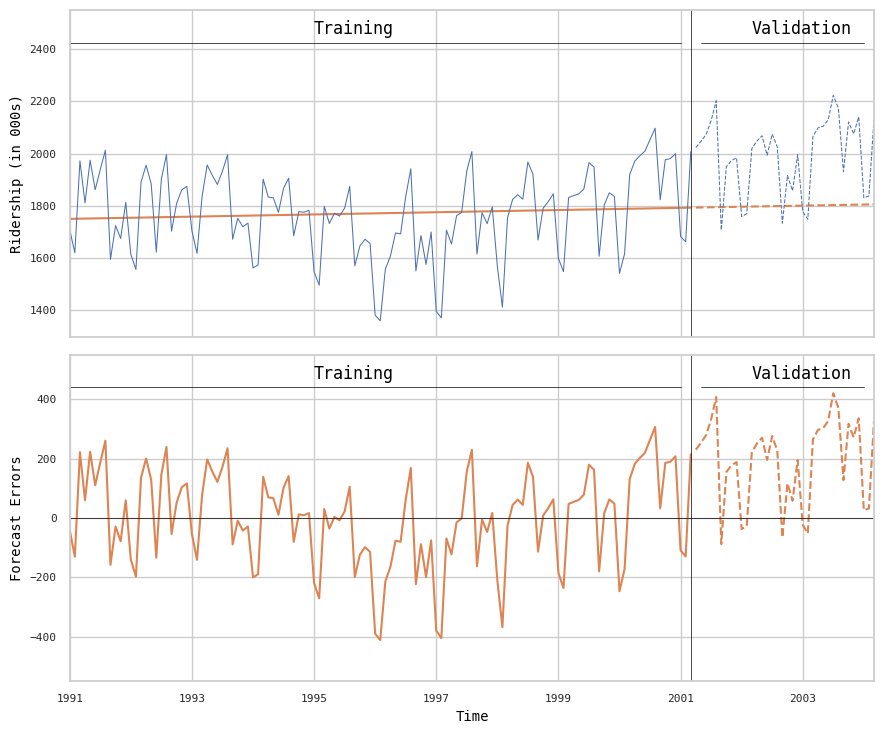

In [ ]:
train_df = ridership_ts[:nTrain]
valid_df = ridership_ts[nTrain:]

train_df = tsatools.add_trend(train_df, trend='ct')
# Fix trend continuity - for capturing the trend the valid_df trend feature
# which captures time must continue after last value of train_df
start_trend = train_df['trend'].iloc[-1] + 1
n_valid = len(valid_df)

valid_df['trend'] = np.arange(start_trend, start_trend + n_valid)
valid_df['const'] = 1  # add intercept column manually

# fit linear model using training set and predict on validation set
ridership_lm = sm.ols(formula='Ridership ~ trend', data=train_df).fit()
predict_df = ridership_lm.predict(valid_df)

# forcasted trend line
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5), sharex=True)
ridership_lm.predict(train_df).plot(ax=axes[0], color='C1')
ridership_lm.predict(valid_df).plot(ax=axes[0], color='C1', linestyle='dashed')

# forcasted errors
residual = train_df.Ridership - ridership_lm.predict(train_df)
residual.plot(ax=axes[1], color='C1')
residual = valid_df.Ridership - ridership_lm.predict(valid_df)
residual.plot(ax=axes[1], color='C1', linestyle='dashed')

#
graphLayout(axes, train_df, valid_df)
plt.tight_layout()
plt.show()

In [ ]:
# model performance
regressionSummary(valid_df.Ridership, predict_df)


Regression statistics

                      Mean Error (ME) : 193.1316
       Root Mean Squared Error (RMSE) : 239.4863
            Mean Absolute Error (MAE) : 209.4371
          Mean Percentage Error (MPE) : 9.2099
Mean Absolute Percentage Error (MAPE) : 10.1477


#### Quadratic Trend and Forecasted Errors

/tmp/ipython-input-24-1614603515.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['trend'] = np.arange(start_trend, start_trend + n_valid)
/tmp/ipython-input-24-1614603515.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['trend_squared'] = valid_df['trend'] ** 2
/tmp/ipython-input-24-1614603515.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

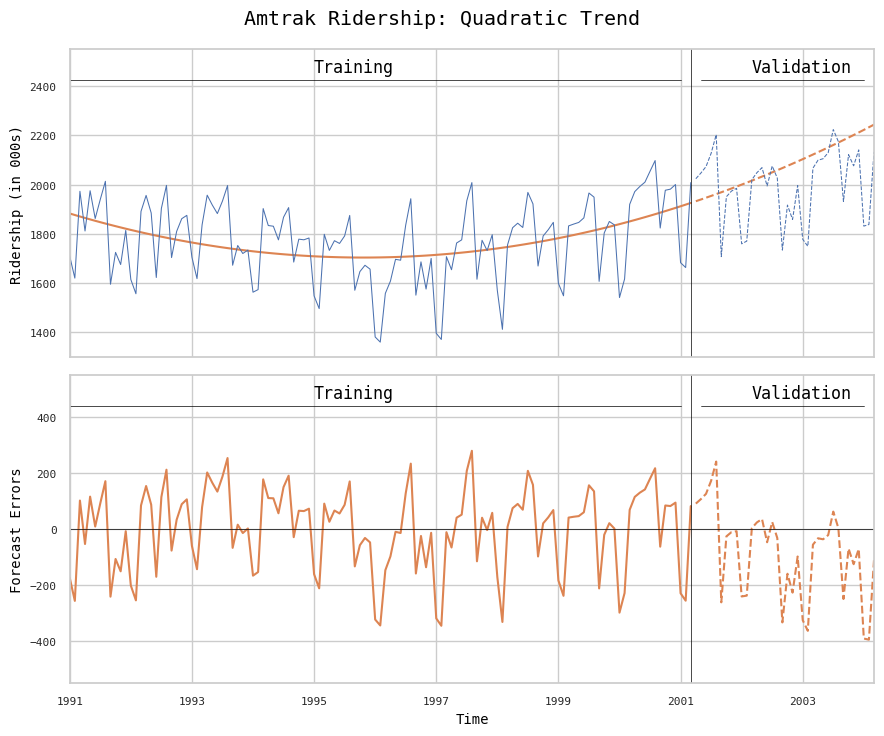

In [ ]:
train_df = ridership_ts[:nTrain]
valid_df = ridership_ts[nTrain:]

train_df = tsatools.add_trend(train_df, trend='ctt')
# Fix trend continuity
start_trend = train_df['trend'].iloc[-1] + 1
n_valid = len(valid_df)

valid_df['trend'] = np.arange(start_trend, start_trend + n_valid)
valid_df['trend_squared'] = valid_df['trend'] ** 2
valid_df['const'] = 1  # add intercept column manually


# fit linear model using training set and predict on validation set
ridership_lm = sm.ols(formula='Ridership ~ trend + trend_squared', data=train_df).fit()
predict_df = ridership_lm.predict(valid_df)

# forcasted trend line
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5), sharex=True)
ridership_lm.predict(train_df).plot(ax=axes[0], color='C1')
ridership_lm.predict(valid_df).plot(ax=axes[0], color='C1', linestyle='dashed')

# forcasted errors
residual = train_df.Ridership - ridership_lm.predict(train_df)
residual.plot(ax=axes[1], color='C1')
residual = valid_df.Ridership - ridership_lm.predict(valid_df)
residual.plot(ax=axes[1], color='C1', linestyle='dashed')

# plot training and validation data
graphLayout(axes, train_df, valid_df)
plt.suptitle('Amtrak Ridership: Quadratic Trend')
plt.tight_layout()
plt.show()

In [ ]:
# model performance
regressionSummary(valid_df.Ridership, predict_df)


Regression statistics

                      Mean Error (ME) : -83.9621
       Root Mean Squared Error (RMSE) : 179.8494
            Mean Absolute Error (MAE) : 133.7383
          Mean Percentage Error (MPE) : -4.7254
Mean Absolute Percentage Error (MAPE) : 7.0757


#### Seasonality
> Seasonality is captured in a regression model by creating a new categorical variable that denotes the season for each value. This categorical variable is then turned into dummies, which in turn are included as predictors in the regression model. To illustrate this, we created a new “Month” column for the Amtrak data, as shown in Table 17.4. Then, to include the Month categorical variable as a predictor in a regression model for Y (Ridership), we turn it into dummies (for m = 12 seasons we create 11 dummies that take on the value 1 if the record falls in that particular season, and 0 otherwise2).

/tmp/ipython-input-26-2640040804.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['trend'] = np.arange(start_trend, start_trend + n_valid)
/tmp/ipython-input-26-2640040804.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['trend_squared'] = valid_df['trend'] ** 2
/tmp/ipython-input-26-2640040804.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

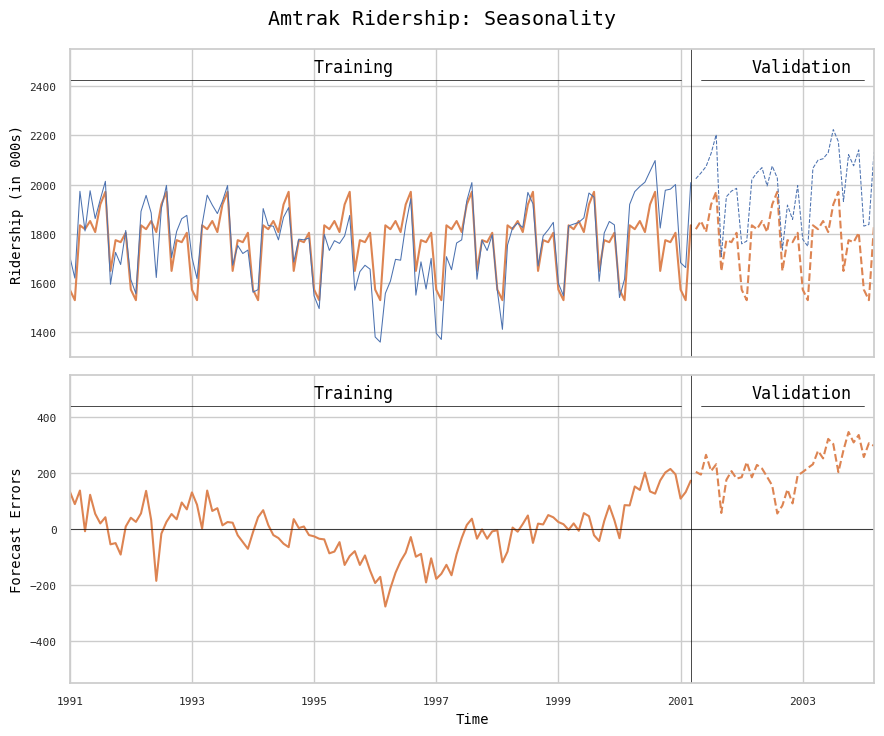

In [ ]:
# formula = Ridership ~ C(Month)
ridership_ts['Month'] = ridership_ts.index.month # add Month Feature
train_df = ridership_ts[:nTrain]
valid_df = ridership_ts[nTrain:]

train_df = tsatools.add_trend(train_df, trend='ctt')
# Fix trend continuity
start_trend = train_df['trend'].iloc[-1] + 1
n_valid = len(valid_df)

valid_df['trend'] = np.arange(start_trend, start_trend + n_valid)
valid_df['trend_squared'] = valid_df['trend'] ** 2
valid_df['const'] = 1  # add intercept column manually


# fit linear model using training set and predict on validation set
ridership_lm = sm.ols(formula='Ridership ~ C(Month)', data=train_df).fit()
predict_df = ridership_lm.predict(valid_df)

# forcasted trend line
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5), sharex=True)
ridership_lm.predict(train_df).plot(ax=axes[0], color='C1')
ridership_lm.predict(valid_df).plot(ax=axes[0], color='C1', linestyle='dashed')

# forcasted errors
residual = train_df.Ridership - ridership_lm.predict(train_df)
residual.plot(ax=axes[1], color='C1')
residual = valid_df.Ridership - ridership_lm.predict(valid_df)
residual.plot(ax=axes[1], color='C1', linestyle='dashed')

# plot training and validation data
graphLayout(axes, train_df, valid_df)
plt.suptitle('Amtrak Ridership: Seasonality')
plt.tight_layout()
plt.show()

In [ ]:
# model performance
regressionSummary(valid_df.Ridership, predict_df)


Regression statistics

                      Mean Error (ME) : 217.9267
       Root Mean Squared Error (RMSE) : 229.6509
            Mean Absolute Error (MAE) : 217.9267
          Mean Percentage Error (MPE) : 10.8646
Mean Absolute Percentage Error (MAPE) : 10.8646


In [ ]:
ridership_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     17.54
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           1.20e-19
Time:                        04:38:45   Log-Likelihood:                -736.38
No. Observations:                 123   AIC:                             1497.
Df Residuals:                     111   BIC:                             1531.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1573.9722     30.578     51.475      0.000    1513.381    1634.564
C(Month)[T.2]    -42.9302     43.243     -0.993      0.323    -128.620      42.759
C(Month)[T.3]    260.7677     43.243      6.030      0.000     175.078     346.457
C(Month)[T.4]    245.0919     44.311      5.531      0.000     157.286     332.897
C(Month)[T.5]    278.2222     44.311      6.279      0.000     190.417     366.028
C(Month)[T.6]    233.4598     44.311      5.269      0.000     145.654     321.265
C(Month)[T.7]    345.3265     44.311      7.793      0.000     257.521     433.132
C(Month)[T.8]    396.6595     44.311      8.952      0.000     308.854     484.465
C(Month)[T.9]     75.7615     44.311      1.710      0.090     -12.044     163.567
C(Month)[T.10]   200.6076     44.311      4.527      0.000     112.802     288.413
C(Month)[T.11]   192.3552     44.311      4.341      0.000     104.550     280.161
C(Month)[T.12]   230.4151     44.311      5.200      0.000     142.610     318.221
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.452
Skew:                          -0.145   Prob(JB):                        0.798
Kurtosis:                       2.937   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The model appears to capture the seasonality in the data. However, since we have not included a trend component in the model (as shown in Section 17.1), the fitted values do not capture the existing trend. Therefore, the residuals, which are the difference between the actual and the fitted values, clearly display the remaining U-shaped trend.

/tmp/ipython-input-29-2184359323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['trend'] = np.arange(start_trend, start_trend + n_valid)
/tmp/ipython-input-29-2184359323.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['trend_squared'] = valid_df['trend'] ** 2
/tmp/ipython-input-29-2184359323.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

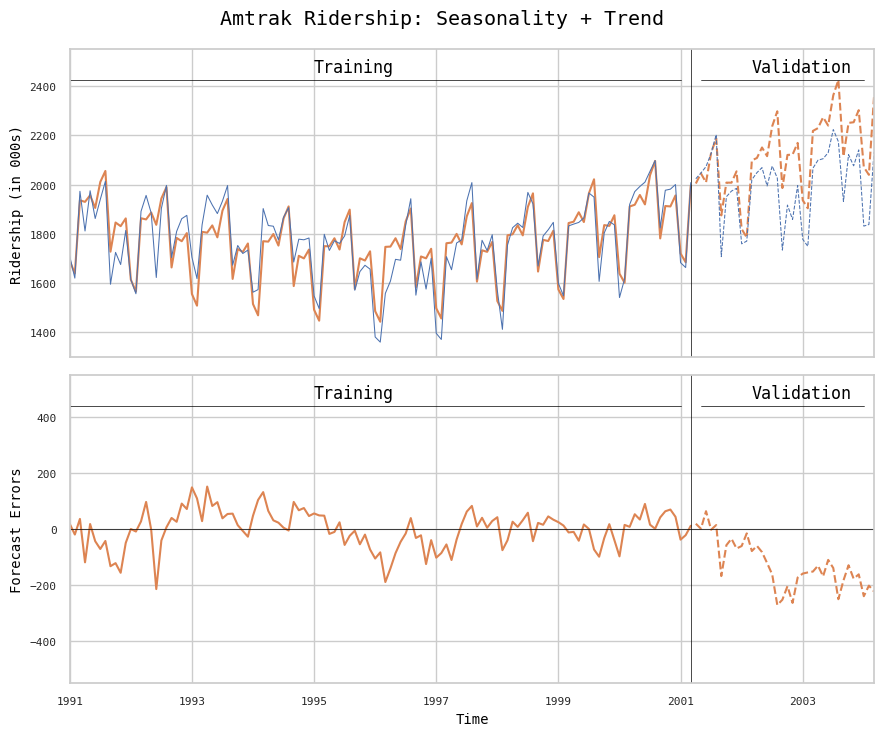

In [ ]:
# formula = Ridership ~ trend + trend_squared + C(Month)
ridership_ts['Month'] = ridership_ts.index.month # add Month Feature
train_df = ridership_ts[:nTrain]
valid_df = ridership_ts[nTrain:]

train_df = tsatools.add_trend(train_df, trend='ctt')
# Fix trend continuity
start_trend = train_df['trend'].iloc[-1] + 1
n_valid = len(valid_df)

valid_df['trend'] = np.arange(start_trend, start_trend + n_valid)
valid_df['trend_squared'] = valid_df['trend'] ** 2
valid_df['const'] = 1  # add intercept column manually


# fit linear model using training set and predict on validation set
ridership_lm = sm.ols(formula='Ridership ~ trend + trend_squared + C(Month)', data=train_df).fit()
predict_df = ridership_lm.predict(valid_df)

# forcasted trend line
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5), sharex=True)
ridership_lm.predict(train_df).plot(ax=axes[0], color='C1')
ridership_lm.predict(valid_df).plot(ax=axes[0], color='C1', linestyle='dashed')

# forcasted errors
residual = train_df.Ridership - ridership_lm.predict(train_df)
residual.plot(ax=axes[1], color='C1')
residual = valid_df.Ridership - ridership_lm.predict(valid_df)
residual.plot(ax=axes[1], color='C1', linestyle='dashed')

# plot training and validation data
graphLayout(axes, train_df, valid_df)
plt.suptitle('Amtrak Ridership: Seasonality + Trend')
plt.tight_layout()
plt.show()

In [ ]:
# model performance
regressionSummary(valid_df.Ridership, predict_df)


Regression statistics

                      Mean Error (ME) : -126.1654
       Root Mean Squared Error (RMSE) : 153.2507
            Mean Absolute Error (MAE) : 131.7250
          Mean Percentage Error (MPE) : -6.4315
Mean Absolute Percentage Error (MAPE) : 6.6987


In [ ]:
# model summary
ridership_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     39.42
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           3.75e-35
Time:                        04:38:47   Log-Likelihood:                -691.27
No. Observations:                 123   AIC:                             1411.
Df Residuals:                     109   BIC:                             1450.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1696.9794     27.675     61.318      0.000    1642.128    1751.831
C(Month)[T.2]    -43.2458     30.241     -1.430      0.156    -103.182      16.690
C(Month)[T.3]    260.0149     30.242      8.598      0.000     200.076     319.954
C(Month)[T.4]    260.6175     31.021      8.401      0.000     199.135     322.100
C(Month)[T.5]    293.7966     31.020      9.471      0.000     232.316     355.278
C(Month)[T.6]    248.9615     31.020      8.026      0.000     187.481     310.442
C(Month)[T.7]    360.6340     31.020     11.626      0.000     299.153     422.115
C(Month)[T.8]    411.6513     31.021     13.270      0.000     350.169     473.134
C(Month)[T.9]     90.3162     31.022      2.911      0.004      28.831     151.801
C(Month)[T.10]   214.6037     31.024      6.917      0.000     153.115     276.092
C(Month)[T.11]   205.6711     31.026      6.629      0.000     144.178     267.165
C(Month)[T.12]   242.9294     31.029      7.829      0.000     181.430     304.429
trend             -7.1559      0.729     -9.812      0.000      -8.601      -5.710
trend_squared      0.0607      0.006     10.660      0.000       0.049       0.072
==============================================================================
Omnibus:                        7.382   Durbin-Watson:                   0.791
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.974
Skew:                          -0.529   Prob(JB):                       0.0306
Kurtosis:                       3.492   Cond. No.                     8.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Autocorrelation and ARIMA Models
*Autocorrelation*
> autocorrelation is the corelation bw a time series and a lagged version of itself. it tells you whether past values of a variable influence its future values.
1. *Difference from Regression Trend forcasting -*
Linear Regression for time series forecasting, captures trend and seasonality however do not account for dependence bw values in different period or cross-sectional data. take it like - if high value is followed by high value, we can adjust the forecast.
2. *How to include it -*\
use a lagged copy of the original series which is moved forward one or more time points. like - creating a another column, with shifting the series by K point. nth row includes value at time (t) and value time (t + K)/ which is called lag. see. 17.7 table.
3. *Computing Correlation bw original and lagged series*



In [ ]:
ridership_ts

,Ridership,Month
Month,,
1991-01-01,1708.917,1
1991-02-01,1620.586,2
1991-03-01,1972.715,3
1991-04-01,1811.665,4
1991-05-01,1974.964,5
...,...,...
2003-11-01,2076.054,11
2003-12-01,2140.677,12
2004-01-01,1831.508,1


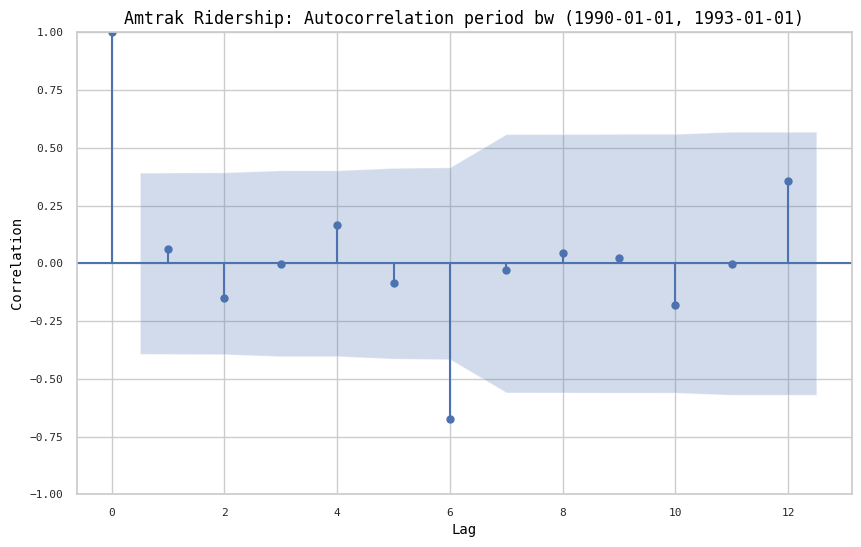

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# 3 years time period
start_period = '1990-01-01'
end_period = '1993-01-01'

plot_acf(ridership_ts.loc[start_period:end_period, 'Ridership'])
plt.title(f'Amtrak Ridership: Autocorrelation period bw ({start_period}, {end_period})')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

##### Interpetation of AutoCorrelation Chart
> **Lags**
1. Lag 0 - means same series would always have 1 correlation.
2. Lag 6 - 6 months lag showing negative (-0.65) showing biannual cycle where ridership alternates bw peaks and valleys bw summer and winter seasons.
3. Lag 12 - showing a positive (0.25) moderate correlation
> **Confidence: Shaded Region**
1. Bars inside the shaded area in a plot_acf chart suggest that the autocorrelation at those lags is statistically insignificant — meaning the observed correlations could easily be caused by random chance, and don’t reflect meaningful memory or seasonality in the data.
2. Bars outside the shaded region indicate statistically significant autocorrelation — those lag values have strong relationships with the current data point and may reveal genuine patterns, like trend continuation or cyclical behavior (e.g., seasonality every 12 months).



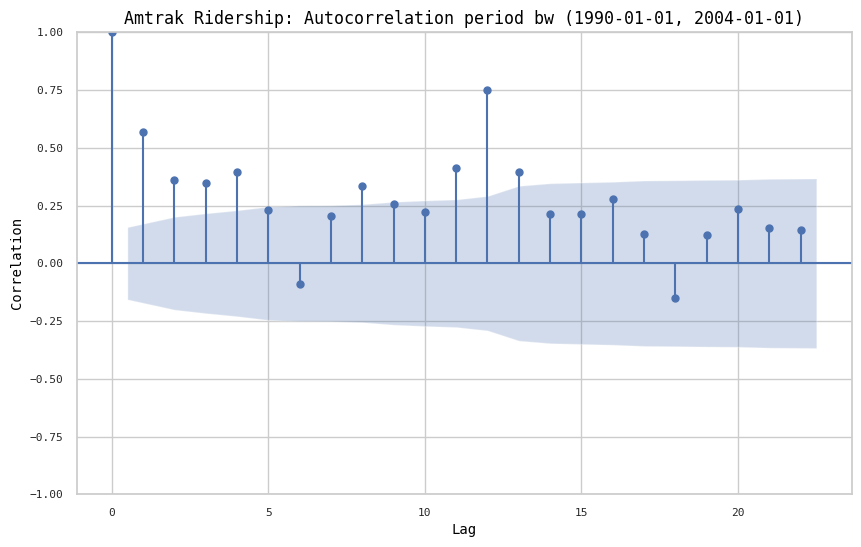

In [ ]:
# playing with another time periods
# 3 years time period
start_period = '1990-01-01'
end_period = '2004-01-01'

plot_acf(ridership_ts.loc[start_period:end_period, 'Ridership'])
plt.title(f'Amtrak Ridership: Autocorrelation period bw ({start_period}, {end_period})')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

##### Interpetations
> We can see the difference bw the autocorrelation plots of both time periods.
1. The 3 year ac says the Lag 6 is statistically significant (confidence: 0.10) while in full time series the Lag 6 is less significant and Lag 12 seems to be more significant with strong positive corr (0.75)
2. Lag 12 means you're comparing ridership this month to exactly 12 months ago. A correlation of ~0.75 implies:
So, if last February had high ridership, this February likely will too. That’s classic annual seasonality. Confidence is +- 0.30 which confirms that seasonality is not by some random flunctuation.

#### Autocorrelation of Residuals

In [ ]:
ridership.head()

,Month,Ridership,log_ridership
0,1991-01-01,1708.917,7.443615
1,1991-02-01,1620.586,7.390543
2,1991-03-01,1972.715,7.587166
3,1991-04-01,1811.665,7.502002
4,1991-05-01,1974.964,7.588305


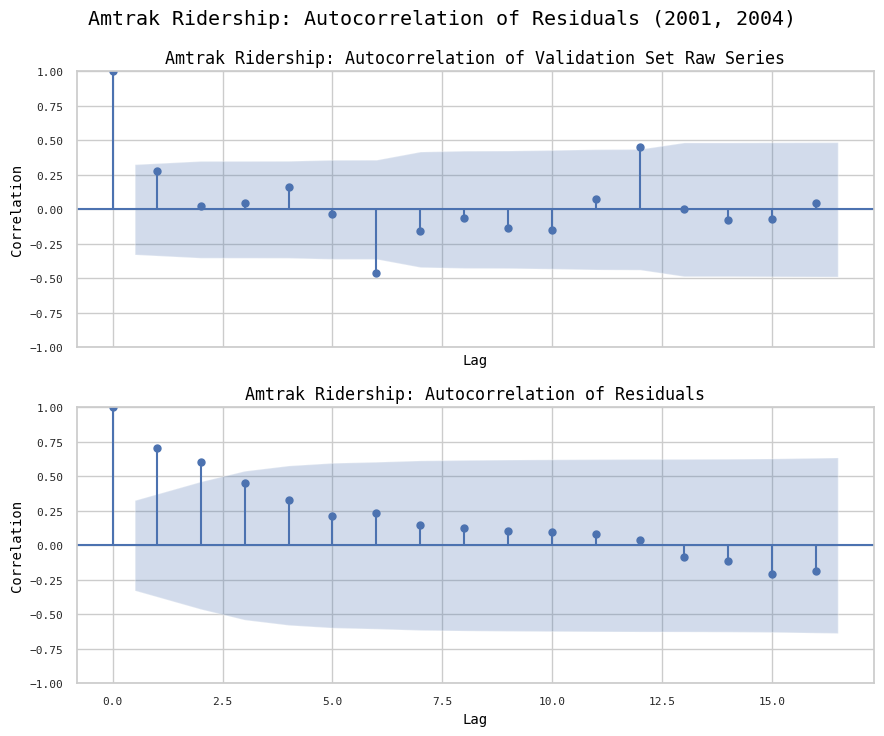

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Ridership time series
ridership_ts = ridership[['Month', 'Ridership']].set_index('Month')

# formula = Ridership ~ trend + trend_squared + C(Month)
ridership_ts['Month'] = ridership_ts.index.month # add Month Feature
train_df = ridership_ts[:nTrain]
valid_df = ridership_ts[nTrain:]

# add trend sesonality and const
train_df = tsatools.add_trend(train_df, trend='ctt')

# Fix trend continuity
start_trend = train_df['trend'].iloc[-1] + 1
n_valid = len(valid_df)

valid_df['trend'] = np.arange(start_trend, start_trend + n_valid)
valid_df['trend_squared'] = valid_df['trend'] ** 2
valid_df['const'] = 1  # add intercept column manually

# -- linear model removes trend and seasonality
# fit linear model using training set and predict on validation set
ridership_lm = sm.ols(formula='Ridership ~ trend + trend_squared + C(Month)', data=train_df).fit()
predict_df = ridership_lm.predict(valid_df)

# add lag 12 to ridership
ridership_ts['lag12'] = ridership_ts['Ridership'].shift(12)

# compare autocorrelation of raw series with residual series valid_df
fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(9, 7.5),
    sharex=True
)

# raw series
plot_acf(valid_df.Ridership, ax=axes[0])
axes[0].set_title('Amtrak Ridership: Autocorrelation of Validation Set Raw Series')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Correlation')

# forcasted errors
residual = valid_df.Ridership - ridership_lm.predict(valid_df)
plot_acf(residual, ax=axes[1])
axes[1].set_title('Amtrak Ridership: Autocorrelation of Residuals')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Correlation')

plt.suptitle(f'Amtrak Ridership: Autocorrelation of Residuals {valid_df.index.min().year, valid_df.index.max().year}')
plt.tight_layout()
plt.show()

##### Interpretation
*specifies if we have adequately modeled the seasonal pattern, the residual series should show no autocorrelation at the seasons's lag.*
> **Amtrak Ridership**: Autocorrelation of Residuals This shows how the model's prediction errors (residuals) relate to their own past.
1. Most bars lie comfortably inside the shaded area, meaning no significant autocorrelation.
2. This is excellent news — it suggests your model has captured the temporal structure well, and leftover patterns are mostly noise.

### Integrating Forecasts by Autocorrelation Information
There are two approaches to do that.
1. Building autocorrelation directly into regression model (AR - autoregressive models)
2. second level forecasting model on residuals.

>

#### Second-Level Forecasting Model

*Steps*-
1. Generate a k-step-ahead forecast of the series (Ft + k), using any forecasting method
2. Generate a k-step-ahead forecast of the forecast error (residual) (Et + k), using an AR (or other) model
3. Improve the initial k-step-ahead forecast of the series by adjusting it according to its forecasted error: Improved F*t + k = Ft + k + Et + k.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# ARIMA params
# order (p, d, q) -> (lag, differences, moving average)

In [ ]:
# Ridership time series
ridership_ts = ridership[['Month', 'Ridership']].set_index('Month')

# formula = Ridership ~ trend + trend_squared + C(Month)
ridership_ts['Month'] = ridership_ts.index.month # add Month Feature
train_df = ridership_ts[:nTrain]
valid_df = ridership_ts[nTrain:]

# add trend sesonality and const
train_df = tsatools.add_trend(train_df, trend='ctt')

# Fix trend continuity
start_trend = train_df['trend'].iloc[-1] + 1
n_valid = len(valid_df)

valid_df['trend'] = np.arange(start_trend, start_trend + n_valid)
valid_df['trend_squared'] = valid_df['trend'] ** 2
valid_df['const'] = 1  # add intercept column manually

# -- second-level forecasting models
# fit linear model using training set and predict on validation set
ridership_lm = sm.ols(formula='Ridership ~ trend + trend_squared + C(Month)', data=train_df).fit()
ridership_arima = ARIMA(
    ridership_lm.resid, # residuals
    order=(12, 0, 1), # AR(12) lag 12, Number of differences (0), Moving Average (1)
    freq='MS', # setting frequency to Monthly
    trend='t' # no trend
).fit()

# forecasts residuals example
forecast = ridership_arima.forecast(1)
print(f'Forecast: {forecast}')

Forecast: 2001-04-01    4.306165
Freq: MS, dtype: float64


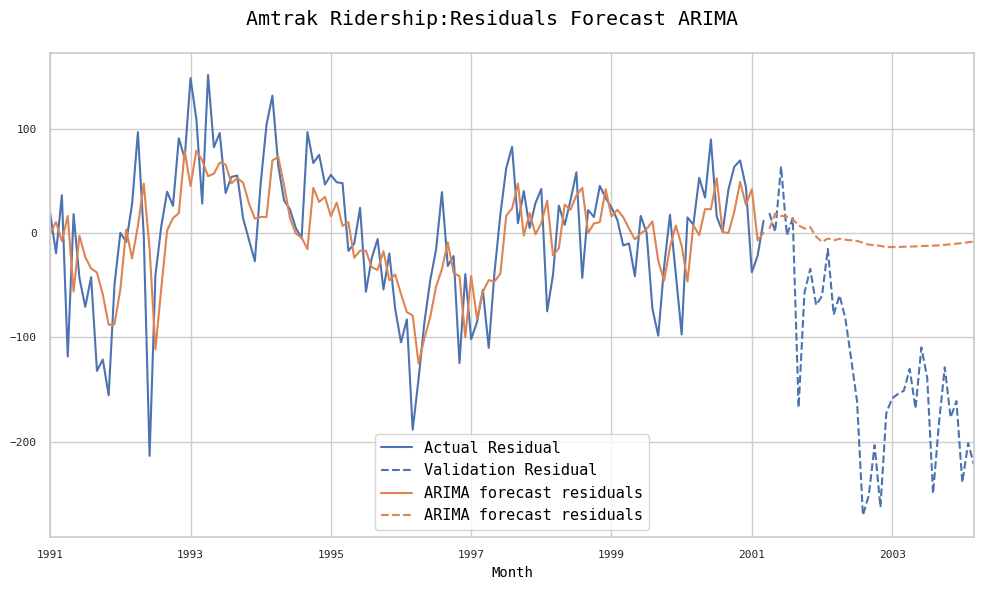

In [ ]:
# Forecast Errors using ARIMA
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)

# forcasted errors
residual = train_df.Ridership - ridership_lm.predict(train_df)
residual.plot(ax=axes, color='C0', label='Actual Residual')
residual = valid_df.Ridership - ridership_lm.predict(valid_df)
residual.plot(ax=axes, color='C0', linestyle='dashed', label='Validation Residual')

# arima forecast error
ridership_arima.fittedvalues.plot(ax=axes, color='C1', label='ARIMA forecast residuals')
forecast_error = ridership_arima.forecast(len(valid_df))
forecast_error.plot(ax=axes, color='C1', linestyle='dashed', label='ARIMA forecast residuals')

#singleGraphLayout(axes, [1300, 2550], train_df, valid_df)
plt.suptitle('Amtrak Ridership:Residuals Forecast ARIMA')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# forecasted errors by arima AR(12)
forecast_error.head(10)

,predicted_mean
2001-04-01,4.306165
2001-05-01,19.092881
2001-06-01,16.837714
2001-07-01,16.340799
2001-08-01,13.666693
2001-09-01,7.656750
2001-10-01,4.639898
2001-11-01,5.985728
2001-12-01,-3.067893
2002-01-01,-8.245049


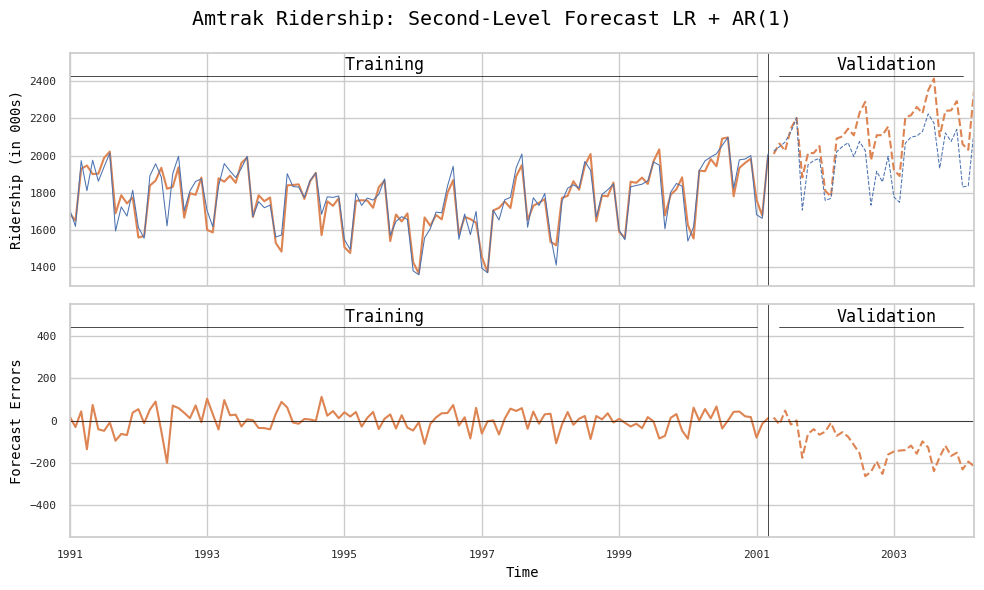

In [ ]:
# Adjust the forecast F(t+k) = F(t+k) + E(t+k)
train_predict_df = ridership_lm.predict(train_df)
train_final_forecast = train_predict_df + ridership_arima.fittedvalues
valid_predict_df = ridership_lm.predict(valid_df)
valid_final_forecast = predict_df + forecast_error

# visualize
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

# plot actual and forecasted values
train_final_forecast.plot(ax=axes[0], color='C1', label='Second-Level Forecast Model')
valid_final_forecast.plot(ax=axes[0], color='C1', linestyle='dashed')

# residuals
residual = train_df.Ridership - train_final_forecast
residual.plot(ax=axes[1], color='C1')
residual = valid_df.Ridership - valid_final_forecast
residual.plot(ax=axes[1], color='C1', linestyle='dashed')

# graph layout
graphLayout(axes, train_df, valid_df)
plt.suptitle('Amtrak Ridership: Second-Level Forecast LR + AR(1)')
plt.tight_layout()
plt.show()

In [ ]:
# model performance
regressionSummary(valid_df.Ridership, valid_final_forecast)


Regression statistics

                      Mean Error (ME) : -121.0302
       Root Mean Squared Error (RMSE) : 145.2543
            Mean Absolute Error (MAE) : 124.5677
          Mean Percentage Error (MPE) : -6.1681
Mean Absolute Percentage Error (MAPE) : 6.3395


##### Autocorrlation ACF

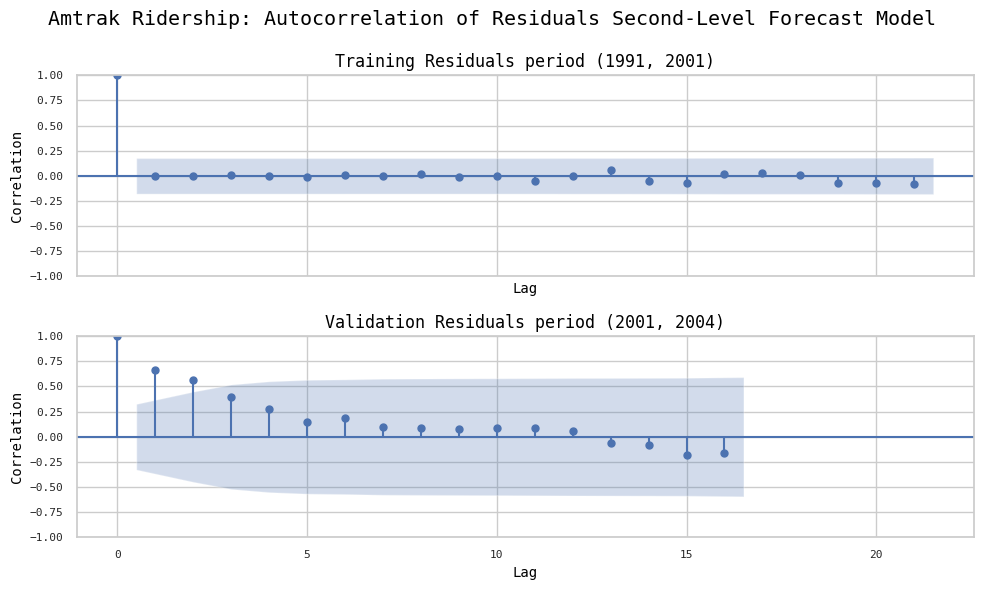

In [ ]:
# acf residuals
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

# train set
residuals = train_df.Ridership - train_final_forecast
plot_acf(residuals, ax=axes[0])
axes[0].set_title(f'Training Residuals period ({train_df.index.min().year}, {train_df.index.max().year})')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Correlation')

# validation set
residuals = valid_df.Ridership - valid_final_forecast
plot_acf(residuals, ax=axes[1])
axes[1].set_title(f'Validation Residuals period ({valid_df.index.min().year}, {valid_df.index.max().year})')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Correlation')

plt.suptitle(f'Amtrak Ridership: Autocorrelation of Residuals Second-Level Forecast Model')
plt.tight_layout()
plt.show()

##### Interpetations
> The training residuals show very little significant autocorrelation, suggesting that the model (regression + AR(1)) performed reasonably well in capturing the patterns within the training data. The slight remaining autocorrelation at Lag 1 might be minor.

> The significant autocorrelation in the validation residuals indicates that the second-level forecast model (regression + AR(1) ARIMA) did not adequately capture the underlying temporal dependencies in the new, unseen validation data

> The reason is that an AR model of order k will usually only provide useful forecasts for the next k periods, and after that forecasts will rely on earlier forecasts rather than on actual data. For example, to forecast the residual of May 2001 when the time of prediction is March 2001, we would need the residual for April 2001. However, because that value is not available, it would be replaced by its forecast. Hence, the forecast for May 2001 would be based on the forecast for April 2001.

### Smoothing Methods

Smoothing is based on averaging over multiple periods in orde to reduce the noise.

1. Moving Average
2. Simple Expoential Smoother

> 1. suitable for forecasting series that contain no trend or seasonality.
2. these are methods are data-driven and able to adapt to changes in the series ove time. Though, need to specify *smoothing constants*

*Libraries* -
> `statsmodels.tsa tsatools` and `tsa.holtwinters ExponentialSmoothing`

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa import tsatools
import statsmodels.formula.api as sm

##### Moving Averages
1. Centered Moving average
2. Trailing Moving average

In [ ]:
# Amtrak data
ridership_ts = ridership[['Month', 'Ridership']].set_index('Month')
ridership_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 1991-01-01 to 2004-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ridership  159 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


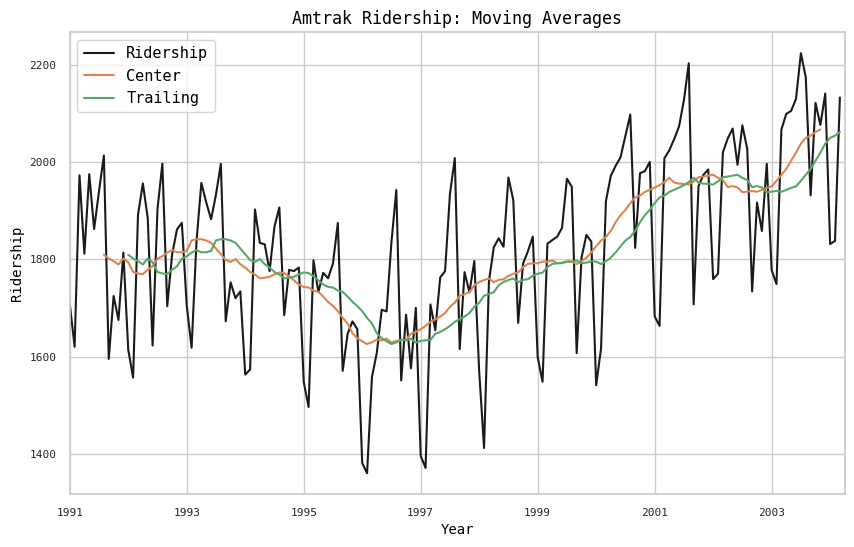

In [ ]:
window = 12

# 1. Centered Moving Average
ma_centered = ridership_ts.rolling(window=window, center=True).mean()

# 2. Trailing Moving Average
ma_trailing = ridership_ts.rolling(window=window, center=False).mean()

# shift the average by one time unit
ma_centered_shift = ma_centered.shift(periods = 1, freq='MS') # shifts by one month
ma_trailing_shift = ma_trailing.shift(periods = 1) # here python automatically infer freq

# visualize
ax = ridership_ts.plot(kind='line', color='k', label='Ridership')
ma_centered_shift.plot(ax=ax, color='C1', label='Centered MA')
ma_trailing_shift.plot(ax=ax, color='C2', label='Trailing MA')
plt.xlabel('Year')
plt.ylabel('Ridership')
plt.title('Amtrak Ridership: Moving Averages')
plt.legend(['Ridership', 'Center', 'Trailing'])
plt.show()

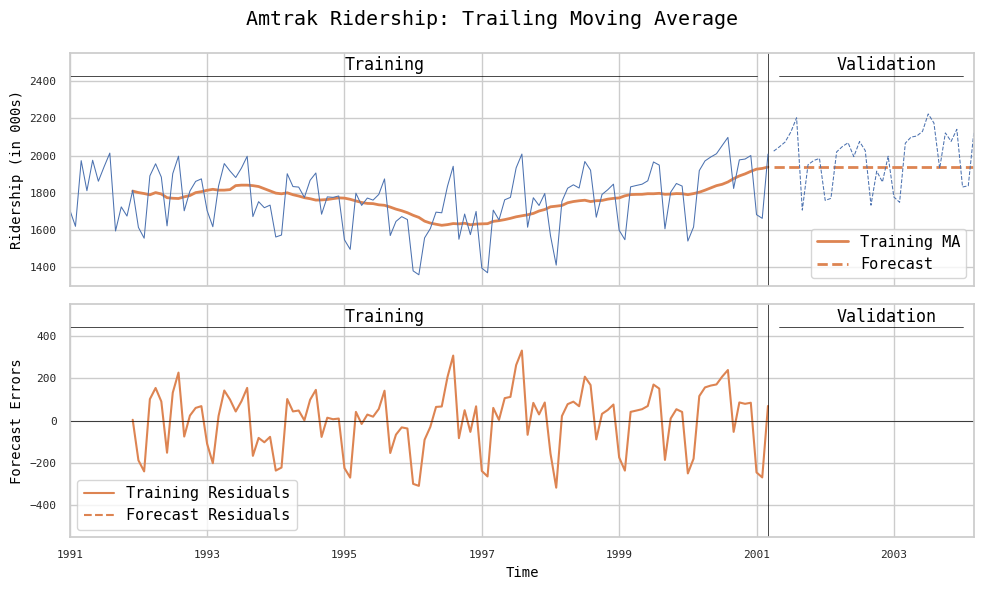

In [ ]:
# forecast with trailing moving average
n = 36
nTrain = len(ridership_ts) - n

# Data Partitioning
train_ts = ridership_ts[:nTrain]
valid_ts = ridership_ts[nTrain:]

# Last Month Moving Average
window = 12 # 12 months average
ma_trailing_train = train_ts.rolling(window=window, center=False).mean()
last_ma = ma_trailing_train.iloc[-1].values[0]

# Forecast
ma_trailing_pred = pd.Series([last_ma]*len(valid_ts), index=valid_ts.index)

# plot actual and forecasted values
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
ma_trailing_train.plot(ax=axes[0], linewidth=2, color='C1')
ma_trailing_pred.plot(ax=axes[0], linewidth=2, color='C1', linestyle='dashed', label='Forecast')
residual = train_ts - ma_trailing_train
residual.plot(ax=axes[1], color='C1')
residual = valid_ts - ma_trailing_pred
residual.plot(ax=axes[1], color='C1', linestyle='dashed', label='Forecast Residuals')
graphLayout(axes, train_ts, valid_ts)
axes[0].legend(['Training MA', 'Forecast'], loc='best')
axes[1].legend(['Training Residuals', 'Forecast Residuals'], loc='best')
plt.suptitle('Amtrak Ridership: Trailing Moving Average')
plt.tight_layout()
plt.show()

In [ ]:
# model performance - Trailing MA
regressionSummary(valid_ts.Ridership, ma_trailing_pred)


Regression statistics

                      Mean Error (ME) : 54.7296
       Root Mean Squared Error (RMSE) : 152.1767
            Mean Absolute Error (MAE) : 135.1550
          Mean Percentage Error (MPE) : 2.2278
Mean Absolute Percentage Error (MAPE) : 6.7771


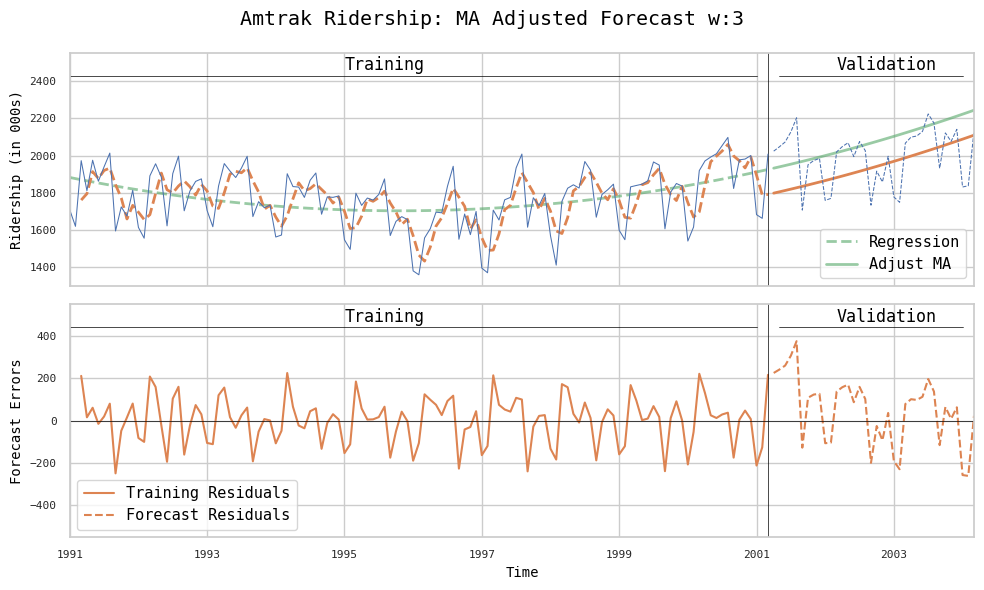

In [ ]:
# fitting regression trend
train_df = tsatools.add_trend(train_ts, trend='ctt')
valid_df = valid_ts.copy()
start_trend = train_df['trend'].iloc[-1] + 1
valid_df['trend'] = np.arange(start_trend, start_trend + len(valid_ts))
valid_df['trend_squared'] = valid_df['trend']**2
valid_df['const'] = 1

# fit linear model using training set and predict on validation set
ridership_lm = sm.ols(
    formula='Ridership ~ trend + trend_squared',
    data=train_df
).fit()

# prediction
train_predict_df = ridership_lm.predict(train_df)
valid_predict_df = ridership_lm.predict(valid_df)

# forecast errors
train_residuals = train_ts.Ridership - train_predict_df
valid_residuals = valid_ts.Ridership - valid_predict_df

# Apply Trailing MA to residuals
window = 3
train_ma_residuals = train_residuals.rolling(window=window, center=False).mean()
last_ma = train_ma_residuals.iloc[-1]
valid_ma_residuals = pd.Series([last_ma]*len(valid_residuals), index=valid_residuals.index)

# Building second level forecasting model
train_adjust_forecast = train_predict_df + train_ma_residuals
valid_adjust_forecast = valid_predict_df + valid_ma_residuals

# visualize
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
train_predict_df.plot(ax=axes[0], linewidth=2, color='C2', label='Regression', alpha=0.6, linestyle='dashed')
valid_predict_df.plot(ax=axes[0], linewidth=2, color='C2', label='Regression', alpha=0.6)
train_adjust_forecast.plot(ax=axes[0], linewidth=2, color='C1', linestyle='dashed', label='Forecast')
valid_adjust_forecast.plot(ax=axes[0], linewidth=2, color='C1', label='Forecast')
residuals = train_ts.Ridership - train_adjust_forecast
residuals.plot(ax=axes[1], color='C1')
residuals = valid_ts.Ridership - valid_adjust_forecast
residuals.plot(ax=axes[1], color='C1', linestyle='dashed')
graphLayout(axes, train_ts, valid_ts)
axes[0].legend(['Regression', 'Adjust MA'], loc='best')
axes[1].legend(['Training Residuals', 'Forecast Residuals'], loc='best')
plt.suptitle(f'Amtrak Ridership: MA Adjusted Forecast w:{window}')
plt.tight_layout()
plt.show()

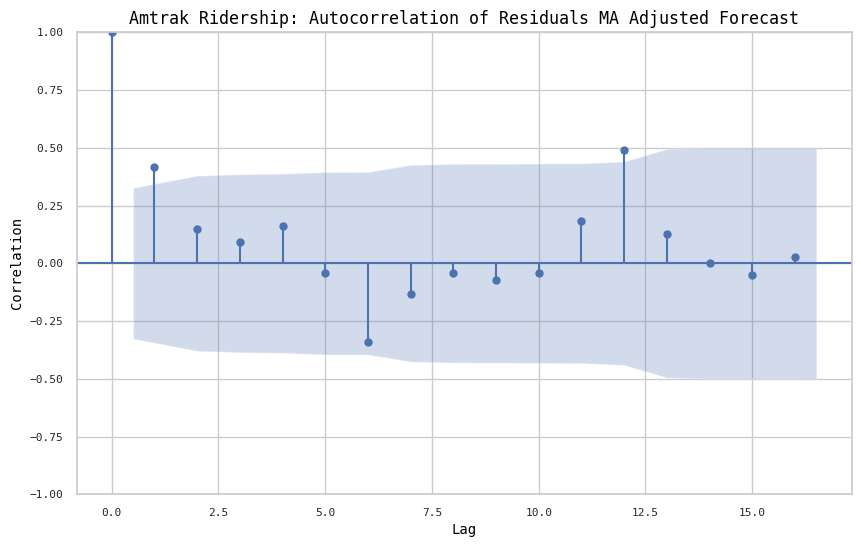

In [ ]:
# plot residual acf
residuals = valid_ts.Ridership - valid_adjust_forecast
plot_acf(residuals)
plt.title(f'Amtrak Ridership: Autocorrelation of Residuals MA Adjusted Forecast')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [ ]:
# model performance - Regression + MA
regressionSummary(valid_ts.Ridership, valid_adjust_forecast)


Regression statistics

                      Mean Error (ME) : 49.9146
       Root Mean Squared Error (RMSE) : 166.6963
            Mean Absolute Error (MAE) : 144.7032
          Mean Percentage Error (MPE) : 2.0270
Mean Absolute Percentage Error (MAPE) : 7.3100


Adding Seasonlity

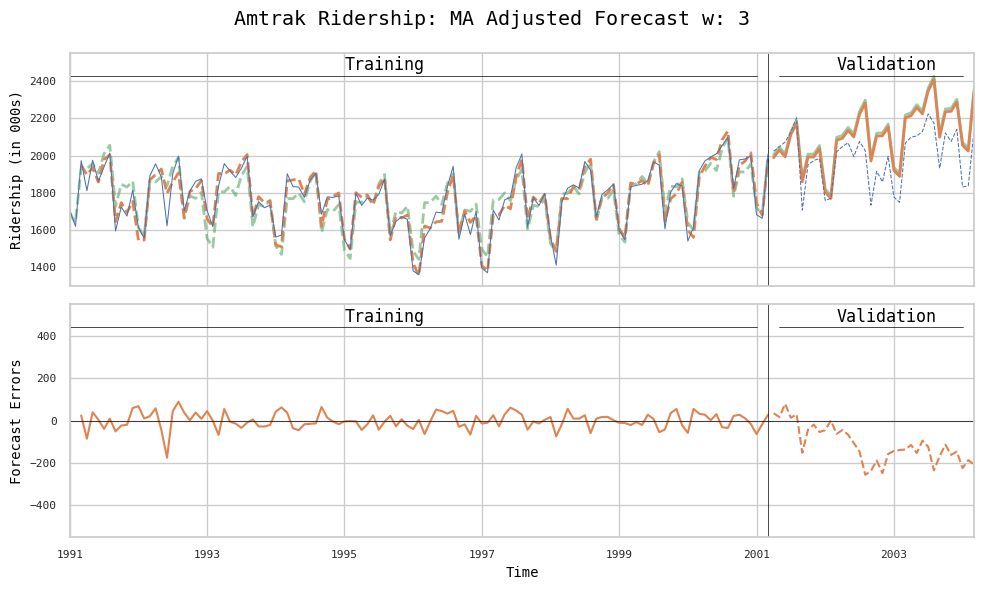

In [ ]:
# fitting regression trend
train_df = tsatools.add_trend(train_ts, trend='ctt')
train_df['Month'] = train_df.index.month

valid_df = valid_ts.copy()
valid_df['Month'] = valid_df.index.month
start_trend = train_df['trend'].iloc[-1] + 1
valid_df['trend'] = np.arange(start_trend, start_trend + len(valid_ts))
valid_df['trend_squared'] = valid_df['trend']**2
valid_df['const'] = 1

# fit linear model using training set and predict on validation set
ridership_lm = sm.ols(
    formula='Ridership ~ trend + trend_squared + C(Month)',
    data=train_df
).fit()

# prediction
train_predict_df = ridership_lm.predict(train_df)
valid_predict_df = ridership_lm.predict(valid_df)

# forecast errors
train_residuals = train_ts.Ridership - train_predict_df
valid_residuals = valid_ts.Ridership - valid_predict_df

# Apply Trailing MA to residuals
window = 3
train_ma_residuals = train_residuals.rolling(window=window, center=False).mean()
last_ma = train_ma_residuals.iloc[-1]
valid_ma_residuals = pd.Series([last_ma]*len(valid_residuals), index=valid_residuals.index)

# Building second level forecasting model
train_adjust_forecast = train_predict_df + train_ma_residuals
valid_adjust_forecast = valid_predict_df + valid_ma_residuals

# visualize
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
train_predict_df.plot(ax=axes[0], linewidth=2, color='C2', label='Regression', alpha=0.6, linestyle='dashed')
valid_predict_df.plot(ax=axes[0], linewidth=2, color='C2', label='Regression', alpha=0.6)
train_adjust_forecast.plot(ax=axes[0], linewidth=2, color='C1', linestyle='dashed', label='Forecast')
valid_adjust_forecast.plot(ax=axes[0], linewidth=2, color='C1', label='Forecast')
residuals = train_ts.Ridership - train_adjust_forecast
residuals.plot(ax=axes[1], color='C1')
residuals = valid_ts.Ridership - valid_adjust_forecast
residuals.plot(ax=axes[1], color='C1', linestyle='dashed')
graphLayout(axes, train_ts, valid_ts)
plt.suptitle(f'Amtrak Ridership: MA Adjusted Forecast w: {window}')
plt.tight_layout()
plt.show()

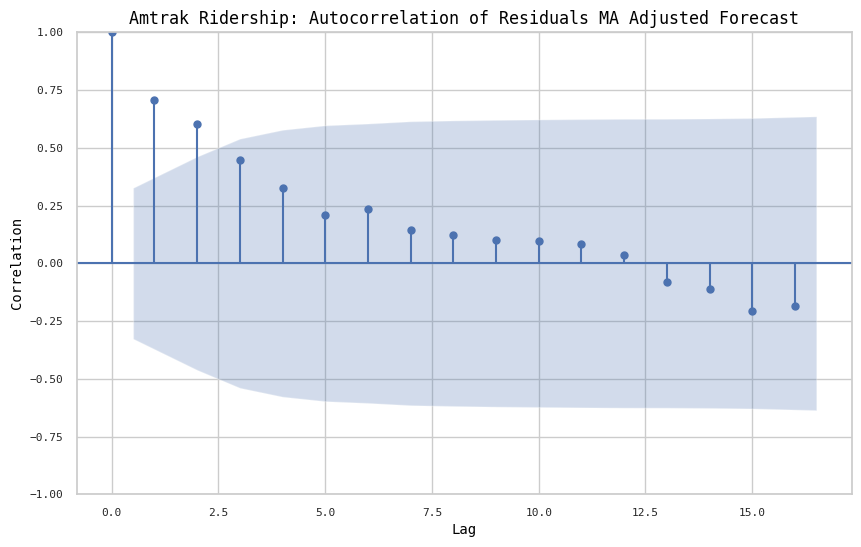

In [ ]:
# plot residual acf
residuals = valid_ts.Ridership - valid_adjust_forecast
plot_acf(residuals)
plt.title(f'Amtrak Ridership: Autocorrelation of Residuals MA Adjusted Forecast')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [ ]:
# model performance - Sesonality Regression + MA
regressionSummary(valid_ts.Ridership, valid_adjust_forecast)


Regression statistics

                      Mean Error (ME) : -110.6161
       Root Mean Squared Error (RMSE) : 140.7266
            Mean Absolute Error (MAE) : 120.4246
          Mean Percentage Error (MPE) : -5.6472
Mean Absolute Percentage Error (MAPE) : 6.1178


### Exponential Smoothing
>  Simple exponential smoothing is similar to forecasting with a moving average, except that instead of taking a simple average over the w most recent values, we take a weighted average of all past values, such that the weights decrease exponentially into the past. The idea is to give more weight to recent information, yet not to completely ignore older information.

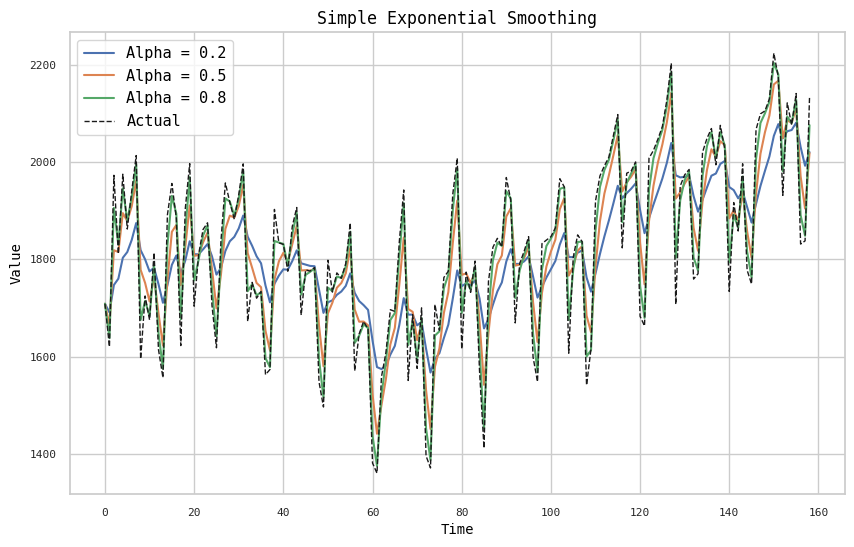

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def exponential_smoothing(series, alpha):
    """
    Performs simple exponential smoothing recursively.

    Parameters:
    - series: A pandas Series of numeric values.
    - alpha: Smoothing factor between 0 and 1.

    Returns:
    - smoothed_series: A pandas Series of smoothed values.
    """
    smoothed_series = [series.iloc[0]]  # Initialize with first value

    for t in range(1, len(series)):
        prev = smoothed_series[-1]
        new = alpha * series.iloc[t] + (1 - alpha) * prev
        smoothed_series.append(new)

    return pd.Series(smoothed_series, index=series.index)


for alpha in [0.2, 0.5, 0.8]:
  rider_exp_smoothed = exponential_smoothing(ridership['Ridership'], alpha)
  plt.plot(rider_exp_smoothed, label=f'Alpha = {alpha}')

plt.plot(ridership['Ridership'], label='Actual', c='k', linewidth=1, linestyle='dashed')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

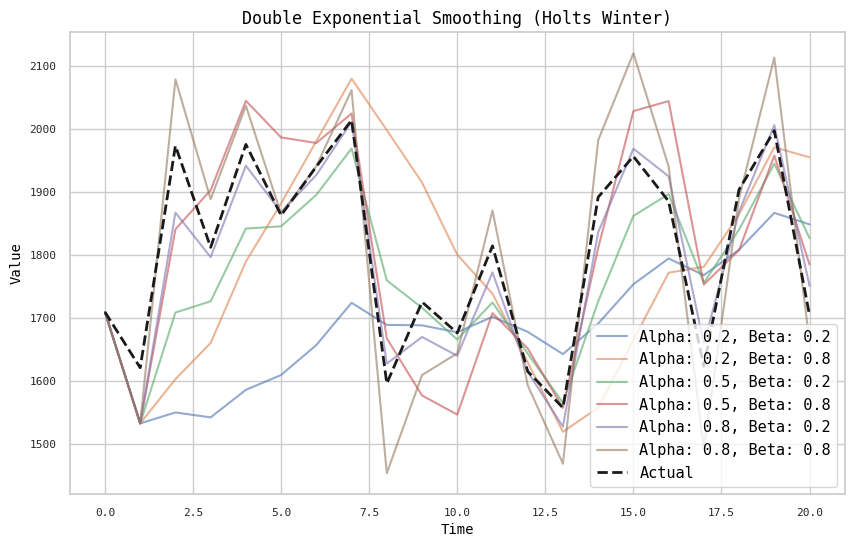

In [ ]:
import pandas as pd
from itertools import product

def double_exponential_smoothing(series, alpha, beta):
    """
    Performs double exponential smoothing (Holt's method).

    Parameters:
    - series: A pandas Series of numeric values.
    - alpha: Smoothing factor for the level.
    - beta: Smoothing factor for the trend.

    Returns:
    - result: A pandas Series of smoothed values.
    """
    result = [series.iloc[0]]  # First smoothed value
    level = series.iloc[0]
    trend = series.iloc[1] - series.iloc[0]  # Initial trend estimate

    for t in range(1, len(series)):
        value = series.iloc[t]
        prev_level = level
        level = alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - prev_level) + (1 - beta) * trend
        result.append(level + trend)

    return pd.Series(result, index=series.index)

alphas = [0.2, 0.5, 0.8]
betas = [0.2, 0.8]

for alpha, beta in product(alphas, betas):
  rider_exp_smoothed = double_exponential_smoothing(ridership['Ridership'].loc[0:20], alpha, beta)
  plt.plot(rider_exp_smoothed, alpha=0.6, label=f'Alpha: {alpha}, Beta: {beta}')

plt.plot(ridership['Ridership'].loc[0:20], label='Actual', c='k', linewidth=2, linestyle='dashed')
plt.title('Double Exponential Smoothing (Holts Winter)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

>1. Lower Alpha/Beta → Smoother forecasts, less responsive to fluctuations.
2. Higher Alpha/Beta → More reactive, better for capturing rapid changes but riskier for noisy data.
3. The best combination depends on your data’s volatility and the importance of capturing short-term trends.

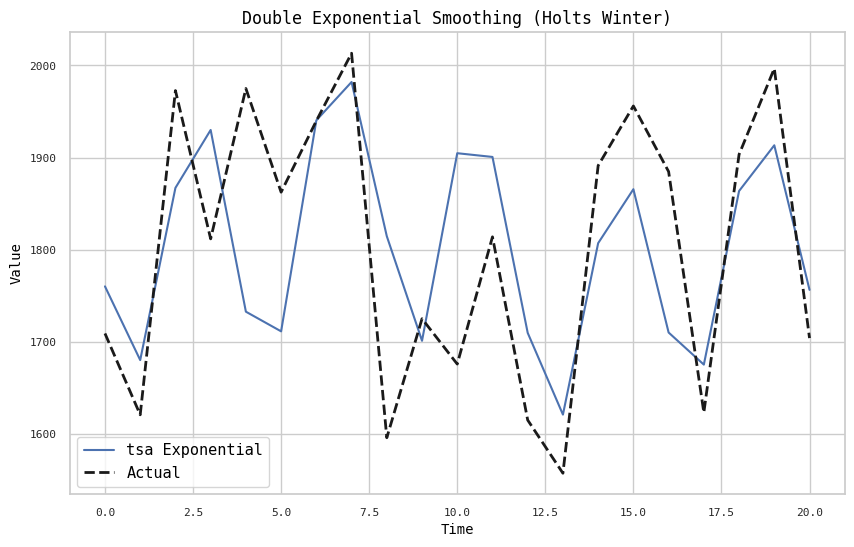

In [ ]:
# Using statsmodel exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

expSmooth = ExponentialSmoothing(
    ridership['Ridership'].loc[0:20],
    trend='add', seasonal='add',
    seasonal_periods=4
)
expSmoothfit = expSmooth.fit(smoothing_level=0.2)

expSmoothfit.fittedvalues.plot(label='tsa Exponential')
plt.plot(ridership['Ridership'].loc[0:20], label='Actual', c='k', linewidth=2, linestyle='dashed')
plt.title('Double Exponential Smoothing (Holts Winter)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
expSmoothfit.summary()

Dep. Variable:,Ridership,No. Observations:,21
Model:,ExponentialSmoothing,SSE,528237.975
Optimized:,True,AIC,216.788
Trend:,None,BIC,218.877
Seasonal:,None,AICC,219.288
Seasonal Periods:,None,Date:,"Sun, 10 Aug 2025"
Box-Cox:,False,Time:,05:26:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
initial_level,1796.9629,l.0,True
